In [2]:
import tensorflow_hub as hub
import tensorflow_text as text



In [13]:
## for data
import pandas as pd
import numpy as np
from sklearn import metrics, manifold
## for processing
import re
import nltk
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for w2v
import gensim
import gensim.downloader as gensim_api
## for bert
import transformers


In [3]:
# # load the pre-processing model 
# preprocess = hub.load('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1')


In [5]:
# # Use BERT pre-processing on a batch of raw text inputs.
# embeddings = preprocess([r'sets/training_text_file/all.txt'])


# The absolute first step is to preprocess the data: cleaning text, removing stop words, and applying lemmatization


In [15]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text


# the next step is to remove stopwords, this may or may not be continued depending on the results. This is because in case of health record data these stop words can change the meaning of the data 

In [18]:
>>> import nltk
>>> nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinayak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
f = open('sets/training_text_file/all.txt', 'r')
content = f.read()
print(content)





Record date: 2106-02-12

Campbell Orthopedic Associates
4 Madera Circle
Omak, GA 28172
 
Habib Valenzuela, M.D.
 
 
                                             Valdez, Harlan Jr.  
                                           845-41-54-4
                                             February 12, 2106 
Har is a 43 year old 6' 214 pound gentleman who is referred for
consultation by Dr. Harlan Oneil.  About a week ago he slipped on
the driveway at home and sustained an injury to his left ankle. 
He was seen at Tri-City Hospital and was told he had a
fracture.  He was placed in an air splint and advised to be
partial weight bearing, and he is using a cane.  He is here for
routine follow-up. 
Past medical history is notable for no ankle injuries previously. 
He has a history of diabetes and sleep apnea.  He takes Prozac,
Cardizem, Glucophage and Amaryl.  He is also followed by Dr. Harold
Nutter for an arrhythmia.  He does not smoke.  He drinks
minimally.  He is a set designer at Columbia P

In [21]:
f.close()


In [26]:
>>> nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vinayak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
clean_text=utils_preprocess_text(content, flg_stemm=False, flg_lemm=True,lst_stopwords=lst_stopwords)

In [28]:
print(clean_text)

record date 21060212 campbell orthopedic associate 4 madera circle omak ga 28172 habib valenzuela md valdez harlan jr 84541544 february 12 2106 har 43 year old 6 214 pound gentleman referred consultation dr harlan oneil week ago slipped driveway home sustained injury left ankle seen tricity hospital told fracture placed air splint advised partial weight bearing using cane routine followup past medical history notable ankle injury previously history diabetes sleep apnea take prozac cardizem glucophage amaryl also followed dr harold nutter arrhythmia smoke drink minimally set designer columbia picture examination today slight tenderness left ankle four fingerbreadth malleolus malleolus nontender medially laterally ligamentous tenderness either dorsal flexion plantar flexion without pain significant swelling skin change small abrasion proximally fibular tenderness proximally anterior pain noted hindfoot midfoot forefoot tenderness noted would like use tube sock air cast using cane ambulat

In [29]:
clean_text_without_stopwords=utils_preprocess_text(content, flg_stemm=False, flg_lemm=True,lst_stopwords=None)

In [30]:
print(clean_text_without_stopwords)

record date 21060212 campbell orthopedic associate 4 madera circle omak ga 28172 habib valenzuela md valdez harlan jr 84541544 february 12 2106 har is a 43 year old 6 214 pound gentleman who is referred for consultation by dr harlan oneil about a week ago he slipped on the driveway at home and sustained an injury to his left ankle he wa seen at tricity hospital and wa told he had a fracture he wa placed in an air splint and advised to be partial weight bearing and he is using a cane he is here for routine followup past medical history is notable for no ankle injury previously he ha a history of diabetes and sleep apnea he take prozac cardizem glucophage and amaryl he is also followed by dr harold nutter for an arrhythmia he doe not smoke he drink minimally he is a set designer at columbia picture on examination today he ha slight tenderness of the left ankle about four fingerbreadth above the malleolus the malleolus is nontender medially or laterally with no ligamentous tenderness eith

# we are going to usw the gensim api to be able to find categories for various fields like medical, diagnosis, patient,date

In [31]:
nlp = gensim_api.load("glove-wiki-gigaword-300")


[==================================================] 100.0% 376.1/376.1MB downloaded


In [32]:
# an example of how the API works
nlp.most_similar(["medical"], topn=3)

[('hospital', 0.6905071139335632),
 ('doctors', 0.6857442259788513),
 ('medicine', 0.6802800297737122)]

In [33]:
nlp.most_similar(["diagnosis"], topn=3)

[('diagnoses', 0.6916384100914001),
 ('diagnostic', 0.6426626443862915),
 ('prognosis', 0.6026152968406677)]

In [34]:
nlp.most_similar(["patient"], topn=3)

[('patients', 0.7844588160514832),
 ('doctors', 0.6233335733413696),
 ('care', 0.5778263211250305)]

In [35]:
nlp.most_similar(["medicine"], topn=3)

[('medical', 0.6802800297737122),
 ('medicines', 0.6489319801330566),
 ('dentistry', 0.5575497150421143)]

# shall use that to create a dictionary of keywords for each category:

In [49]:
## Function to apply
def get_similar_words(lst_words, top, nlp):
    lst_out = lst_words
    for tupla in nlp.most_similar(lst_words, topn=top):
        lst_out.append(tupla[0])
    return list(set(lst_out))
## Create Dictionary {category:[keywords]}
dic_clusters = {}
dic_clusters["medical problem"] = get_similar_words(['pain','cardiovascular','lupus','chest'], 
                  top=30, nlp=nlp)
dic_clusters["medication"] = get_similar_words(['paracetamol','aspirin']
                  , top=30, nlp=nlp)
## print some
for k,v in dic_clusters.items():
    print(k, ": ", v[0:5], "...", len(v))


medical problem :  ['chronic', 'asthma', 'nausea', 'patients', 'trauma'] ... 34
medication :  ['acetaminophen', 'aspirin', 'tamoxifen', 'nsaids', 'aleve'] ... 32


E:\anoconda\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
E:\anoconda\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


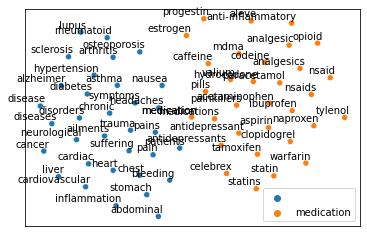

In [50]:
## word embedding
tot_words = [word for v in dic_clusters.values() for word in v]
X = nlp[tot_words]
        
## pca
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
X = pca.fit_transform(X)

## create dtf
dtf = pd.DataFrame()
for k,v in dic_clusters.items():
    size = len(dtf) + len(v)
    dtf_group = pd.DataFrame(X[len(dtf):size], columns=["x","y"], 
                             index=v)
    dtf_group["cluster"] = k
    dtf = dtf.append(dtf_group)
        
## plot
fig, ax = plt.subplots()
sns.scatterplot(data=dtf, x="x", y="y", hue="cluster", ax=ax)
ax.legend().texts[0].set_text(None)
ax.set(xlabel=None, ylabel=None, xticks=[], xticklabels=[], 
       yticks=[], yticklabels=[])
for i in range(len(dtf)):
    ax.annotate(dtf.index[i], 
               xy=(dtf["x"].iloc[i],dtf["y"].iloc[i]), 
               xytext=(5,2), textcoords='offset points', 
               ha='right', va='bottom')
